In [1]:
# Neural network classification with pytorch

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"X: {X[:5]}")
print(f"y: {y[:5]}")

X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
y: [1 1 1 1 0]


In [5]:
# Make DataFrame of circle Data
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


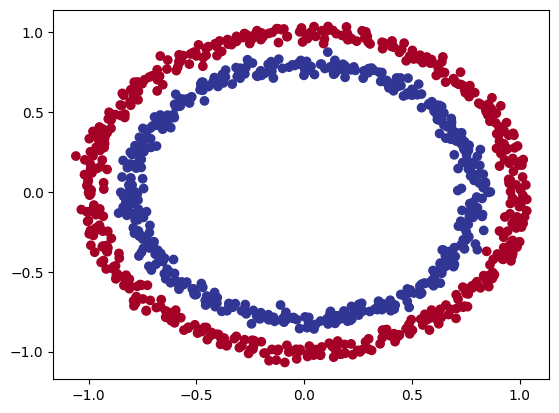

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x = X[:,0], y = X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
# The data here is reffered to as a toy dataset, a dataset that is small enough to experiment on but still sizable enough to practice the fundamentals

In [8]:
# Check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
X_sample = X[0]
y_sample = y[0]
print(f"Sample input features: {X_sample}")
print(f"Sample target value: {y_sample}")
shape_X = X_sample.shape
shape_y = y_sample.shape
print(f"Shape of X: {shape_X}")
print(f"Shape of y: {shape_y}")

Sample input features: [0.75424625 0.23148074]
Sample target value: 1
Shape of X: (2,)
Shape of y: ()


In [11]:
# Turn data into tensors and create train and test splits

In [12]:
import torch
torch.__version__

'2.4.1+cu121'

In [13]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [14]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [15]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [16]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [17]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [19]:
# Building the model

# 1. Set up device agnostic code
# 2. Constuct a model by subclassing nn.Module
# 3. Define loss function and optimizer
# 4. Training and test loop

In [20]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [21]:
X_train.shape

torch.Size([800, 2])

In [22]:
y_train

tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 0., 0., 0., 

In [23]:
# Subclasses nn.Module, create 2 nn.Linear() layers that are capable of handling the shapes of our data
# Define a forward() method that outlines the forward pass of our model
# Instantiate an instance of our model class and send it to the target device

In [24]:
# Constuct the model

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    #2 Create 2 nn.Linear() layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and spits out 1

  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer 1 -> layer 2 -> output

# Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV1().to(device)
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
device

'cuda'

In [26]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [27]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [28]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4740,  0.6036],
                      [-0.0120, -0.0744],
                      [-0.6346, -0.6609],
                      [ 0.1376, -0.5997],
                      [ 0.2457,  0.5327]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1457, -0.2852,  0.3024,  0.0546,  0.4543], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0540,  0.1863, -0.4236, -0.2430, -0.2485]], device='cuda:0')),
             ('1.bias', tensor([0.1547], device='cuda:0'))])

In [29]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"{len(untrained_preds)} , {untrained_preds.shape}")
print(f"{len(X_test)} , {X_test.shape}")
print(f"{untrained_preds[:5]}")
print(f"{y_test[:10]}")

200 , torch.Size([200, 1])
200 , torch.Size([200, 2])
tensor([[-0.0026],
        [ 0.1412],
        [-0.3617],
        [ 0.0991],
        [-0.3337]], device='cuda:0')
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [30]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [31]:
# Setup loss function and optimizer
# Loss function? Optimizer? -> Depends on the problem
# Regression - MAE or MSE
# Classification - binary crossentropy or categorical crossentroy
# optimizers - SGD and Adam, pytorch has a lot more

In [32]:
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation built in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [33]:
# Calculate accuracy - out of 100 examples what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [34]:
#Train model

# Forward pass
# Calc the loss
# Optimizer zero grad
# Loss backward
# Optimizer (gradient descent)

In [35]:
# Our model outputs are going to be raw logits -> logits can be converted into prediction probabilities by passing them through some king of activation function(sigmoid, softmax) -> convert model probabilities into prediction labels by rouding them or taking the argmax()

In [36]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0026],
        [ 0.1412],
        [-0.3617],
        [ 0.0991],
        [-0.3337]], device='cuda:0', grad_fn=<SliceBackward0>)

In [37]:
# Use the sigmoid activation fcn on our logits

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4994],
        [0.5352],
        [0.4105],
        [0.5248],
        [0.4173]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [38]:
torch.round(y_pred_probs)

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [39]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [40]:
# Find the predicted labels

y_preds = torch.round(y_pred_probs)

# logits -> pred probs -> pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 1., 0., 1., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [41]:
# Building a training and test loop

!nvidia-smi

Tue Sep 24 07:33:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0              29W /  70W |    151MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [42]:
torch.cuda.manual_seed(8)

epochs = 300

# put the data to the target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calc loss/acc
  loss = loss_fn(y_logits, # nn.BCEwithLogits expects raw logits as input
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward - backpropagation
  loss.backward()

  # Optimizer step - gradient descent
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 10 == 0:
    print(f"EPoch: {epoch}, Loss {loss:.5f}, Acc: {acc:.2f}%, Test loss: {test_loss:.5f}, Test_acc:{test_acc:.2f}%")

EPoch: 0, Loss 0.70053, Acc: 48.00%, Test loss: 0.70947, Test_acc:46.50%
EPoch: 10, Loss 0.69723, Acc: 49.25%, Test loss: 0.70535, Test_acc:45.50%
EPoch: 20, Loss 0.69557, Acc: 49.75%, Test loss: 0.70283, Test_acc:45.50%
EPoch: 30, Loss 0.69465, Acc: 49.75%, Test loss: 0.70113, Test_acc:47.00%
EPoch: 40, Loss 0.69410, Acc: 50.12%, Test loss: 0.69989, Test_acc:46.00%
EPoch: 50, Loss 0.69376, Acc: 50.25%, Test loss: 0.69894, Test_acc:45.00%
EPoch: 60, Loss 0.69353, Acc: 50.75%, Test loss: 0.69820, Test_acc:45.50%
EPoch: 70, Loss 0.69338, Acc: 50.62%, Test loss: 0.69761, Test_acc:45.50%
EPoch: 80, Loss 0.69327, Acc: 50.88%, Test loss: 0.69713, Test_acc:46.00%
EPoch: 90, Loss 0.69319, Acc: 50.88%, Test loss: 0.69673, Test_acc:45.50%
EPoch: 100, Loss 0.69314, Acc: 50.88%, Test loss: 0.69641, Test_acc:45.50%
EPoch: 110, Loss 0.69310, Acc: 51.00%, Test loss: 0.69614, Test_acc:46.00%
EPoch: 120, Loss 0.69307, Acc: 51.00%, Test loss: 0.69592, Test_acc:46.00%
EPoch: 130, Loss 0.69305, Acc: 51.00

In [43]:
# Make predictions and evaluate the model

# Model is guessing basically

# Make some predictions and make them visual

In [44]:
import requests
from pathlib import Path

#Dld helper funtions

if Path("helper_functions.py").is_file():
  print("Already exists")
else:
  print("Downloading helper fncs")
  request = requests.get(r"https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

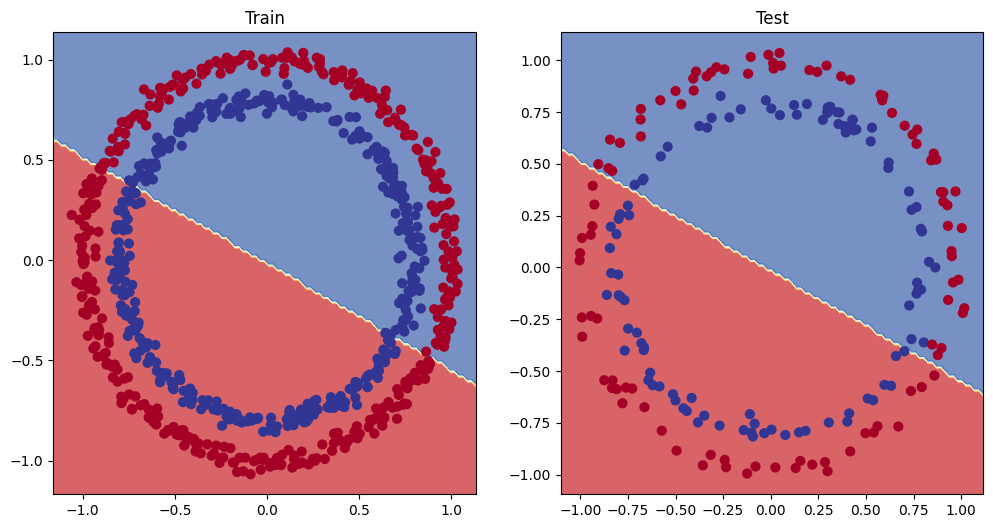

In [45]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

In [46]:
#Improving a model - From a model's perspective
# Add more layers - give the model more changes to learn about patterns in the data
# Add more hidden units - go from 5 hidden units to 10 hidden units
# Fit for longer
# Changing the activation function
# Change the learning rate
# Change the loss function

# These options are all from a model's perspective because they deal directly with the model and not the data

In [47]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4755,  0.6007],
                      [-0.0296, -0.0992],
                      [-0.6027, -0.6132],
                      [ 0.1575, -0.5707],
                      [ 0.2736,  0.5708]])),
             ('0.bias', tensor([-0.1426, -0.2681,  0.2667,  0.0334,  0.4295])),
             ('1.weight',
              tensor([[ 0.0025,  0.1739, -0.2430, -0.1705, -0.3103]])),
             ('1.bias', tensor([0.2517]))])

In [48]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    #2 Create 3 nn.Linear() layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.4186,  0.3105],
                      [ 0.6751, -0.4724],
                      [-0.5157,  0.5628],
                      [-0.4433,  0.6805],
                      [-0.1986, -0.2072],
                      [ 0.4964,  0.6821],
                      [ 0.0487,  0.3121],
                      [ 0.0007, -0.5972],
                      [ 0.3580,  0.2634],
                      [ 0.5079, -0.2769]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.3110, -0.4064, -0.5536,  0.6932, -0.6943, -0.6502,  0.1536,  0.4978,
                      -0.0121,  0.5652], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0242,  0.1991, -0.3011,  0.2759,  0.2948,  0.2975,  0.0190, -0.2324,
                       -0.0159, -0.2939],
                      [-0.0132,  0.0138,  0.0514, -0.1150,  0.1216,  0.0050,  0.0431, -0.0759,
                       -0.0851, -0.0248],
                      [ 0.2093, -0.204

In [50]:
# Create a loss funtion

loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [51]:
torch.manual_seed(8)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data on target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> labels

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 100 == 0:
    print(f"EPoch: {epoch}, Loss {loss:.5f}, Acc: {acc:.2f}%, Test loss: {test_loss:.5f}, Test_acc:{test_acc:.2f}%")

EPoch: 0, Loss 0.71387, Acc: 50.00%, Test loss: 0.70401, Test_acc:50.00%
EPoch: 100, Loss 0.69328, Acc: 49.62%, Test loss: 0.69343, Test_acc:51.00%
EPoch: 200, Loss 0.69300, Acc: 51.25%, Test loss: 0.69441, Test_acc:47.50%
EPoch: 300, Loss 0.69298, Acc: 51.38%, Test loss: 0.69465, Test_acc:46.50%
EPoch: 400, Loss 0.69298, Acc: 51.00%, Test loss: 0.69469, Test_acc:45.50%
EPoch: 500, Loss 0.69298, Acc: 51.38%, Test loss: 0.69469, Test_acc:45.50%
EPoch: 600, Loss 0.69298, Acc: 51.25%, Test loss: 0.69469, Test_acc:46.00%
EPoch: 700, Loss 0.69298, Acc: 51.12%, Test loss: 0.69468, Test_acc:46.00%
EPoch: 800, Loss 0.69298, Acc: 51.12%, Test loss: 0.69468, Test_acc:46.00%
EPoch: 900, Loss 0.69298, Acc: 51.12%, Test loss: 0.69468, Test_acc:46.00%


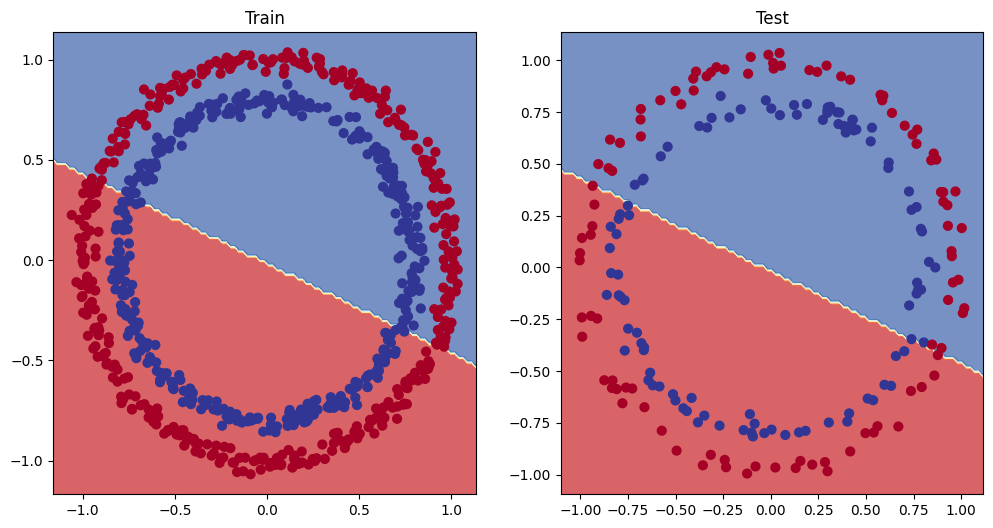

In [52]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

In [53]:
# One way to troubleshoot is to test out a smaller problem

# create some data

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

train_split = int(0.8 * len(X_regression))

In [54]:
len(X_regression)

100

In [55]:
X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [56]:
X_train_reg, y_train_reg = X_regression[:train_split], y_regression[:train_split]
X_test_reg, y_test_reg = X_regression[train_split:], y_regression[train_split:]
len(X_train_reg), len(y_train_reg), len(X_test_reg), len(y_test_reg)

(80, 80, 20, 20)

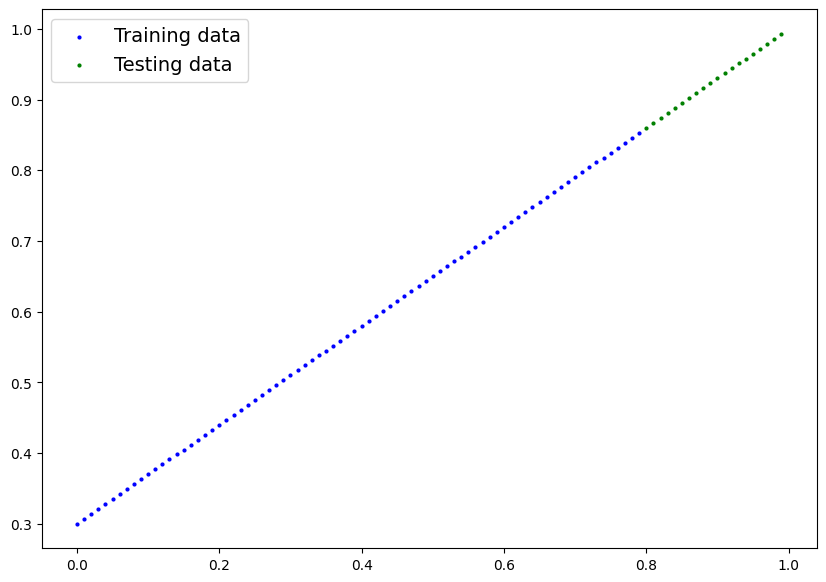

In [57]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg,
                 predictions=None)

In [58]:
# Adjust model 1 to fit a straight line

In [59]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [60]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.001)

In [61]:
#train the model

torch.manual_seed(8)
torch.cuda.manual_seed(42)

epochs = 5000

# Put data on target device

X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)
X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device)

for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(X_train_reg)

  loss = loss_fn(y_pred, y_train_reg)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_reg)

    test_loss = loss_fn(test_pred, y_test_reg)

  if epoch % 100 == 0:
    print(f"EPoch: {epoch}, Loss {loss:.5f}, Acc: {acc:.2f}%, Test loss: {test_loss:.5f}, Test_acc:{test_acc:.2f}%")

EPoch: 0, Loss 0.49853, Acc: 51.12%, Test loss: 0.75400, Test_acc:46.00%
EPoch: 100, Loss 0.09170, Acc: 51.12%, Test loss: 0.24678, Test_acc:46.00%
EPoch: 200, Loss 0.05398, Acc: 51.12%, Test loss: 0.12511, Test_acc:46.00%
EPoch: 300, Loss 0.04669, Acc: 51.12%, Test loss: 0.10762, Test_acc:46.00%
EPoch: 400, Loss 0.03921, Acc: 51.12%, Test loss: 0.09025, Test_acc:46.00%
EPoch: 500, Loss 0.03150, Acc: 51.12%, Test loss: 0.07251, Test_acc:46.00%
EPoch: 600, Loss 0.02353, Acc: 51.12%, Test loss: 0.05401, Test_acc:46.00%
EPoch: 700, Loss 0.01527, Acc: 51.12%, Test loss: 0.03505, Test_acc:46.00%
EPoch: 800, Loss 0.00667, Acc: 51.12%, Test loss: 0.01520, Test_acc:46.00%
EPoch: 900, Loss 0.00442, Acc: 51.12%, Test loss: 0.00014, Test_acc:46.00%
EPoch: 1000, Loss 0.00462, Acc: 51.12%, Test loss: 0.00028, Test_acc:46.00%
EPoch: 1100, Loss 0.00447, Acc: 51.12%, Test loss: 0.00018, Test_acc:46.00%
EPoch: 1200, Loss 0.00450, Acc: 51.12%, Test loss: 0.00023, Test_acc:46.00%
EPoch: 1300, Loss 0.0045

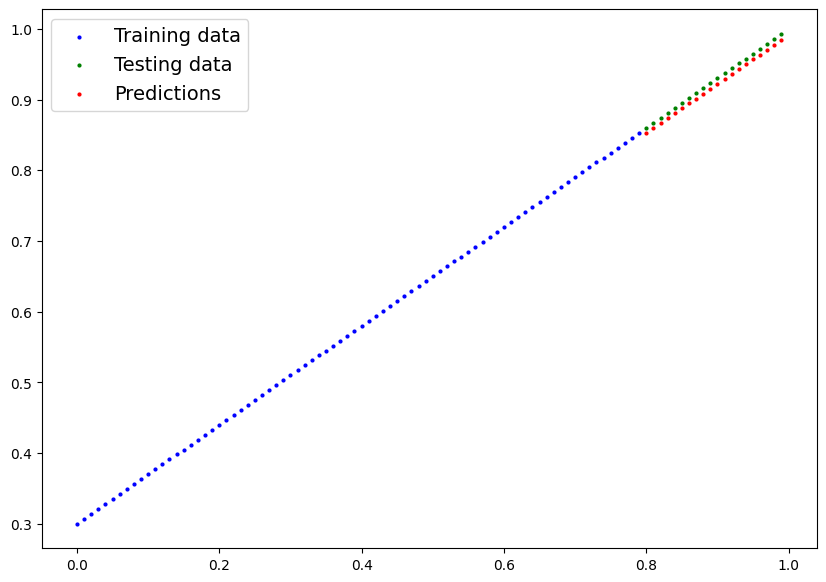

In [62]:
# Turn on evaluation mode
model_2.eval()

#Make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_reg)

#plot data and preds
plot_predictions(train_data=X_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=X_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=y_preds.cpu())

In [63]:
# Non-linearity
# Patterns wih an infinite number of straight and non-straight lines

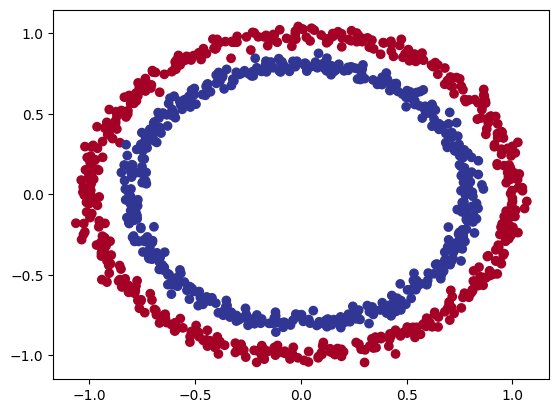

In [64]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                  noise=0.03,
                  random_state=8)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [65]:
import torch
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(array([[-0.81910824,  0.49851035],
        [-0.78666852, -0.29255154],
        [-0.2609075 , -1.01069252],
        [ 0.31465234,  0.97088442],
        [ 0.84762219, -0.51156564]]),
 array([0, 1, 0, 0, 0]))

In [66]:
# Build a model with non-linear activation funtions
from torch import nn

class CricleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CricleModelV2().to(device)
model_3

CricleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [67]:
# Loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [69]:
device

'cuda'

In [73]:
torch.manual_seed(8)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data on target device

# X_train, y_train = torch.from_numpy(X_train).type(torch.float), torch.from_numpy(y_train).type(torch.float)
# X_test, y_test = torch.from_numpy(X_test).type(torch.float), torch.from_numpy(y_test).type(torch.float)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> labels

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 10 == 0:
    print(f"EPoch: {epoch}, Loss {loss:.5f}, Acc: {acc:.2f}%, Test loss: {test_loss:.5f}, Test_acc:{test_acc:.2f}%")

EPoch: 0, Loss 0.67678, Acc: 64.88%, Test loss: 0.68333, Test_acc:64.00%
EPoch: 10, Loss 0.67624, Acc: 64.88%, Test loss: 0.68280, Test_acc:65.00%
EPoch: 20, Loss 0.67569, Acc: 65.12%, Test loss: 0.68224, Test_acc:65.00%
EPoch: 30, Loss 0.67511, Acc: 65.25%, Test loss: 0.68167, Test_acc:65.00%
EPoch: 40, Loss 0.67452, Acc: 65.75%, Test loss: 0.68109, Test_acc:64.00%
EPoch: 50, Loss 0.67391, Acc: 65.75%, Test loss: 0.68048, Test_acc:63.50%
EPoch: 60, Loss 0.67328, Acc: 65.12%, Test loss: 0.67985, Test_acc:63.00%
EPoch: 70, Loss 0.67263, Acc: 64.88%, Test loss: 0.67919, Test_acc:63.00%
EPoch: 80, Loss 0.67194, Acc: 64.88%, Test loss: 0.67850, Test_acc:63.50%
EPoch: 90, Loss 0.67124, Acc: 64.12%, Test loss: 0.67779, Test_acc:61.50%
EPoch: 100, Loss 0.67050, Acc: 63.25%, Test loss: 0.67706, Test_acc:60.00%
EPoch: 110, Loss 0.66974, Acc: 62.75%, Test loss: 0.67631, Test_acc:58.50%
EPoch: 120, Loss 0.66894, Acc: 61.75%, Test loss: 0.67551, Test_acc:59.00%
EPoch: 130, Loss 0.66812, Acc: 61.88

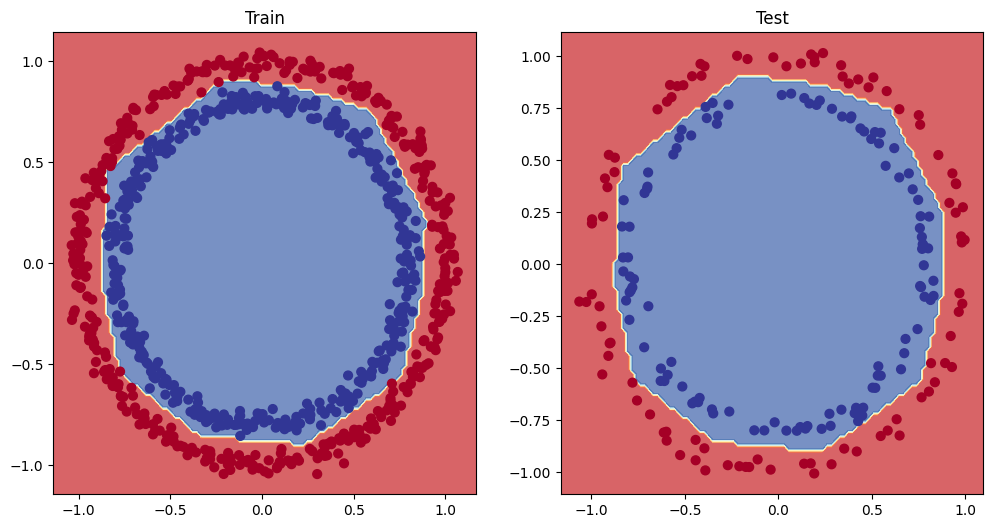

In [74]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

In [75]:
# Replicating non-linear activation functions

In [76]:
A = torch.arange(-10, 10, 0.1).unsqueeze(dim=1)
A[:5]

tensor([[-10.0000],
        [ -9.9000],
        [ -9.8000],
        [ -9.7000],
        [ -9.6000]])

In [77]:
A.dtype

torch.float32

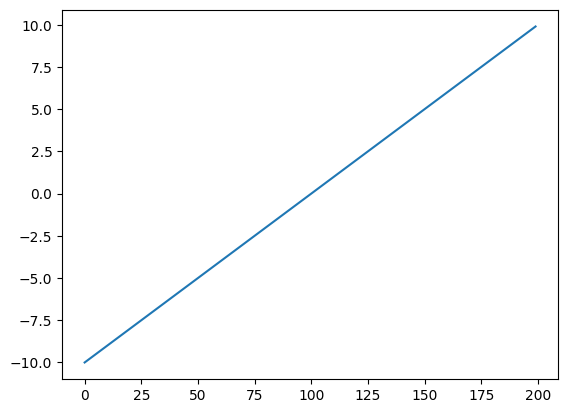

In [78]:
plt.plot(A)

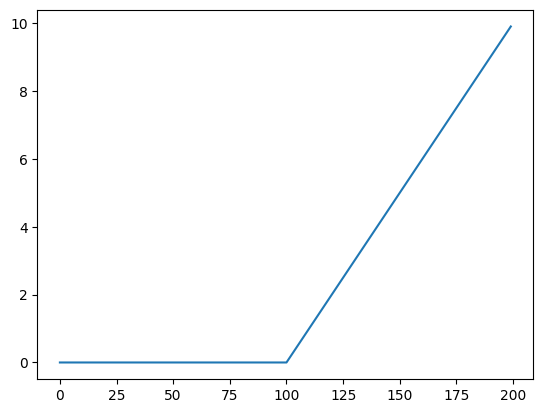

In [79]:
plt.plot(torch.relu(A))

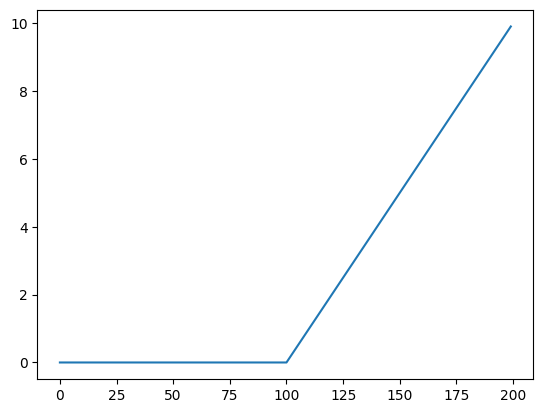

In [80]:
def relu(x: torch.tensor) -> torch.tensor:
  return torch.max(torch.tensor(0), x)

plt.plot(relu(A))

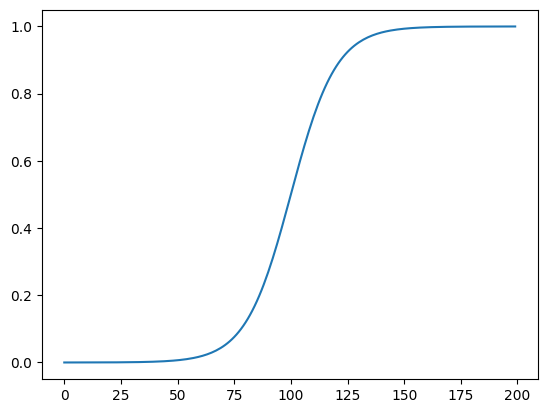

In [81]:
plt.plot(torch.sigmoid(A))

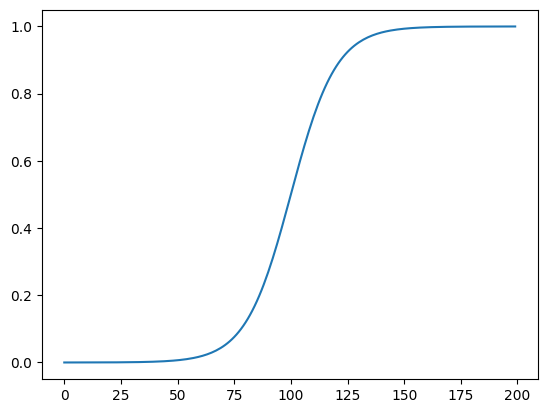

In [82]:
def sigmoid(x: torch.tensor) -> torch.tensor:
  return 1/(1+torch.exp(-x))

plt.plot(sigmoid(A))

In [83]:
# Putting it all together

In [142]:
# Create a toy multiclass dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set params
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 8

# Create multiclass data

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=2.5,
                            random_state=RANDOM_SEED)

In [143]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=8)

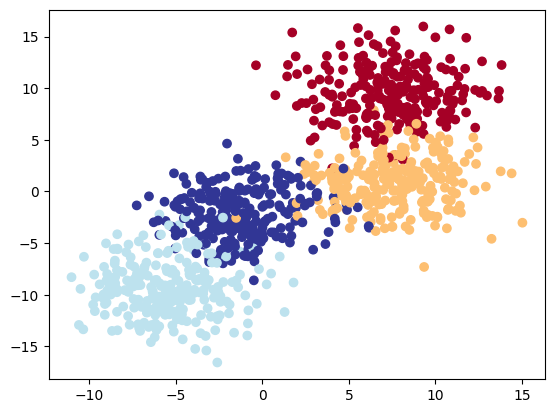

In [144]:
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [145]:
# building a multi-class classification model
# Create device agnostic code

In [146]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [147]:
# Build a multiclass classification model

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 0):

    """Initializes multi-class classification model

    Args: input_features (int): Number of input features
          output_features (int): Number of output features
          hidden_units (int): Number of hidden units between layers
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of blob model

model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [148]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [149]:
y_train.unique()

tensor([0, 1, 2, 3])

In [150]:
# Create a loss function for multi-class classification

loss_fn = nn.CrossEntropyLoss()

# Create an optimizer

optimizer = torch.optim.SGD(params=model_4.parameters(),
                             lr=0.1)

In [151]:
# Building a training loop

model_4.eval()

with torch.inference_mode():
  y_logits = model_4.forward(X_test.to(device))

y_logits[:10]

tensor([[-0.3498,  0.1008, -0.8162, -0.1930],
        [ 0.1362, -0.2596, -0.3510,  0.0278],
        [ 0.3445,  0.0790,  0.3507, -0.0798],
        [ 0.1907,  0.1118,  0.1021, -0.0569],
        [ 0.2104, -0.6429, -0.9139,  0.3975],
        [-1.0107,  0.3707, -1.6568, -0.6453],
        [ 0.1442, -0.3785, -0.5356,  0.1486],
        [-0.8431,  0.3025, -1.4212, -0.5709],
        [-0.5107,  0.1674, -0.9539, -0.4234],
        [ 0.1155, -0.2012, -0.2517, -0.0417]], device='cuda:0')

In [152]:
# In order to evaluate and train and test our model, we need to convert our models outputs from logits to prediction probabilities and then to labels

# Logits to pred probs

y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[0.2290, 0.3594, 0.1437, 0.2679],
        [0.3140, 0.2114, 0.1929, 0.2817],
        [0.2918, 0.2237, 0.2936, 0.1909],
        [0.2763, 0.2553, 0.2528, 0.2157],
        [0.3382, 0.1441, 0.1099, 0.4078],
        [0.1440, 0.5731, 0.0755, 0.2075],
        [0.3222, 0.1910, 0.1633, 0.3236],
        [0.1662, 0.5225, 0.0932, 0.2181],
        [0.2126, 0.4189, 0.1365, 0.2320],
        [0.3053, 0.2224, 0.2114, 0.2609]], device='cuda:0')

In [153]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [154]:
# Conver models pred probs to pred labels

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 0, 2, 0, 3, 1, 3, 1, 1, 0], device='cuda:0')

In [155]:
# Logits(raw output) -> Pred probs(torch.softmax) -> Pred labels(torch.argmax)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_train) # raw output
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # pred probs to labels

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test)
    test_pred = torch.softmax(test_logits, dim=1).softmax(dim=1)
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred.argmax(dim=1))

  if epoch % 100 == 0:
    print(f"EPoch: {epoch}, Loss {loss:.5f}, Acc: {acc:.2f}%, Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

EPoch: 0, Loss 1.71393, Acc: 14.12%, Test loss: 1.40928, Test acc: 28.50%
EPoch: 100, Loss 0.29802, Acc: 88.88%, Test loss: 0.31663, Test acc: 89.00%
EPoch: 200, Loss 0.21873, Acc: 92.25%, Test loss: 0.21773, Test acc: 93.00%
EPoch: 300, Loss 0.18841, Acc: 93.25%, Test loss: 0.17928, Test acc: 94.50%
EPoch: 400, Loss 0.17463, Acc: 94.00%, Test loss: 0.16269, Test acc: 95.00%
EPoch: 500, Loss 0.16758, Acc: 94.00%, Test loss: 0.15529, Test acc: 95.00%
EPoch: 600, Loss 0.16327, Acc: 93.88%, Test loss: 0.15033, Test acc: 94.50%
EPoch: 700, Loss 0.16080, Acc: 94.00%, Test loss: 0.14673, Test acc: 94.50%
EPoch: 800, Loss 0.15905, Acc: 94.12%, Test loss: 0.14454, Test acc: 94.50%
EPoch: 900, Loss 0.15769, Acc: 94.12%, Test loss: 0.14314, Test acc: 94.50%


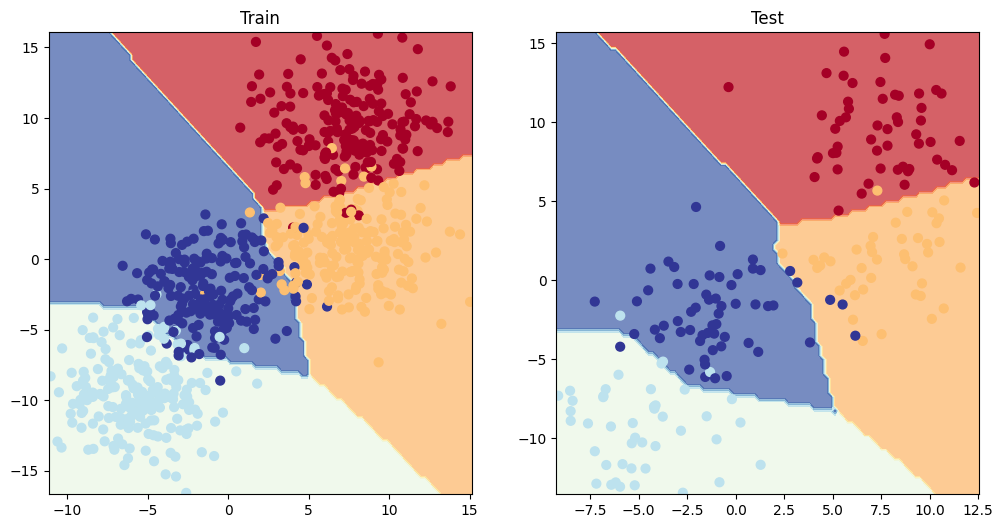

In [156]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_test,y_test)

In [157]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test.to("cpu"))
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

y_pred[:10]

tensor([3, 3, 0, 0, 1, 2, 1, 2, 3, 1])

In [159]:
# Evaluating a model
# Accuracy - out of 100 samples how many does our model get right?
# Precision
# Recall
# F1 score
# Confusion matrix
# Classification report